# MasterCamp_TD9_TD10

## Analyse exploratoire des données :

In [50]:
import pandas as pd
url="https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1"

df= pd.read_csv(url,on_bad_lines="skip", delimiter="|",decimal=",")
df.info()

C:\Users\Marc\AppData\Local\Temp\ipykernel_11676\4174985104.py:4: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(url,on_bad_lines="skip", delimiter="|",decimal=",")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             float64
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [51]:
df_2023=df.dropna(axis=1,how="all")
#on enlève toutes les colonnes vides

In [52]:
df_2023["missing"]=df_2023.isnull().mean(axis=1) * 100
df_2023["missing"]=df_2023["missing"]>=69.0
df_2023[df_2023["missing"] == True]
#code pour savoir par lignes le taux de valeurs manquantes
#il y a des lignes à partir de 31% de valeurs manquantes (265 lignes)

C:\Users\Marc\AppData\Local\Temp\ipykernel_11676\2177564441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023["missing"]=df_2023.isnull().mean(axis=1) * 100
C:\Users\Marc\AppData\Local\Temp\ipykernel_11676\2177564441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023["missing"]=df_2023["missing"]>=69.0


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,missing
134205,1,17/01/2023,Vente en l'état futur d'achèvement,907000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
136636,1,10/02/2023,Vente en l'état futur d'achèvement,738000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
143650,1,24/04/2023,Vente en l'état futur d'achèvement,778000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
144317,1,04/05/2023,Vente en l'état futur d'achèvement,968000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
144318,1,04/05/2023,Vente en l'état futur d'achèvement,968000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625353,1,13/01/2023,Vente en l'état futur d'achèvement,269000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3625354,1,13/01/2023,Vente en l'état futur d'achèvement,269000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3626094,1,06/04/2023,Vente en l'état futur d'achèvement,282960.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3626097,1,06/04/2023,Vente en l'état futur d'achèvement,250472.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [53]:
df_2023["Date mutation"] = pd.to_datetime(df_2023["Date mutation"],dayfirst=True)
#modification de "Date mutation" en une date pour améliorer la lisibilité

C:\Users\Marc\AppData\Local\Temp\ipykernel_11676\779884074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023["Date mutation"] = pd.to_datetime(df_2023["Date mutation"],dayfirst=True)


In [54]:
df_2023=df_2023.drop_duplicates()
df_2023.info()
#on enlève les données qui ont pu être dupliqué, en regardant le nombre de lignes

<class 'pandas.core.frame.DataFrame'>
Index: 3454257 entries, 0 to 3727004
Data columns (total 36 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   No disposition              int64         
 1   Date mutation               datetime64[ns]
 2   Nature mutation             object        
 3   Valeur fonciere             float64       
 4   No voie                     float64       
 5   B/T/Q                       object        
 6   Type de voie                object        
 7   Code voie                   object        
 8   Voie                        object        
 9   Code postal                 float64       
 10  Commune                     object        
 11  Code departement            object        
 12  Code commune                int64         
 13  Prefixe de section          float64       
 14  Section                     object        
 15  No plan                     int64         
 16  No Volume              

In [55]:
carrez_columns = ['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']
print(df_2023[carrez_columns])
#print(df_2023["Surface Carrez du 1er lot"], df_2023["Surface Carrez du 2eme lot"],df_2023["Surface Carrez du 3eme lot"],df_2023["Surface Carrez du 4eme lot"],df_2023["Surface Carrez du 5eme lot"])
#print(df_2023['Surface totale lots'])


         Surface Carrez du 1er lot  Surface Carrez du 2eme lot  \
0                              NaN                         NaN   
1                              NaN                         NaN   
2                              NaN                         NaN   
3                              NaN                         NaN   
4                              NaN                         NaN   
...                            ...                         ...   
3727000                        NaN                         NaN   
3727001                        NaN                         NaN   
3727002                        NaN                         NaN   
3727003                        NaN                         NaN   
3727004                        NaN                         NaN   

         Surface Carrez du 3eme lot  Surface Carrez du 4eme lot  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2     

In [56]:
df_2023['Surface Carrez du 1er lot'] = df_2023['Surface Carrez du 1er lot'].fillna(0.0)
df_2023['Surface Carrez du 2eme lot'] = df_2023['Surface Carrez du 2eme lot'].fillna(0.0)
df_2023['Surface Carrez du 3eme lot'] = df_2023['Surface Carrez du 3eme lot'].fillna(0.0)
df_2023['Surface Carrez du 4eme lot'] = df_2023['Surface Carrez du 4eme lot'].fillna(0.0)
df_2023['Surface Carrez du 5eme lot'] = df_2023['Surface Carrez du 5eme lot'].fillna(0.0)

#le fillna est individuel car j'avais des bugs si je mettais le carrez_columns

df_2023["Total_carrez"]=df_2023[carrez_columns].sum(axis=1)
#on met dans la nouvelle colonne créée les valeurs 

In [87]:
df_2023_tot=df_2023["Total_carrez"].sort_values(ascending=False)
#vérification de si les valueurs sont bien mises dans la colonne

In [58]:
mask=df_2023_tot > 0.0
df_2023_tot_Sc=df_2023_tot[mask]

In [59]:
mask=df_2023["Total_carrez"]==0.0
df_carrez_null=df_2023[mask]

In [60]:
df_2023['Surface terrain'] = df_2023['Surface terrain'].fillna(0.0)
df_2023['Surface reelle bati'] = df_2023['Surface reelle bati'].fillna(0.0)

mask=(df_2023["Surface terrain"]==0.0)&(df_2023["Total_carrez"]==0.0)&(df_2023["Surface reelle bati"]==0.0)
df_carrez_trp_null=df_2023[mask]

In [61]:
mask=df_2023["Surface reelle bati"]==0.0
df_bati=df_2023[mask]
mask_0=df_2023["Total_carrez"]==0.0
df_car=df_2023[mask_0]

In [62]:
mask_=(df_2023["Commune"]=="BEYNES")&(df_2023["Date mutation"]=="2023-02-23")
df_com=df_2023[mask_]

In [63]:
mask=df_2023["Valeur fonciere"].isna()==True
df_2023_val1=df_2023[mask]

In [64]:
df_2023.dropna(subset=["Valeur fonciere"],inplace=True)

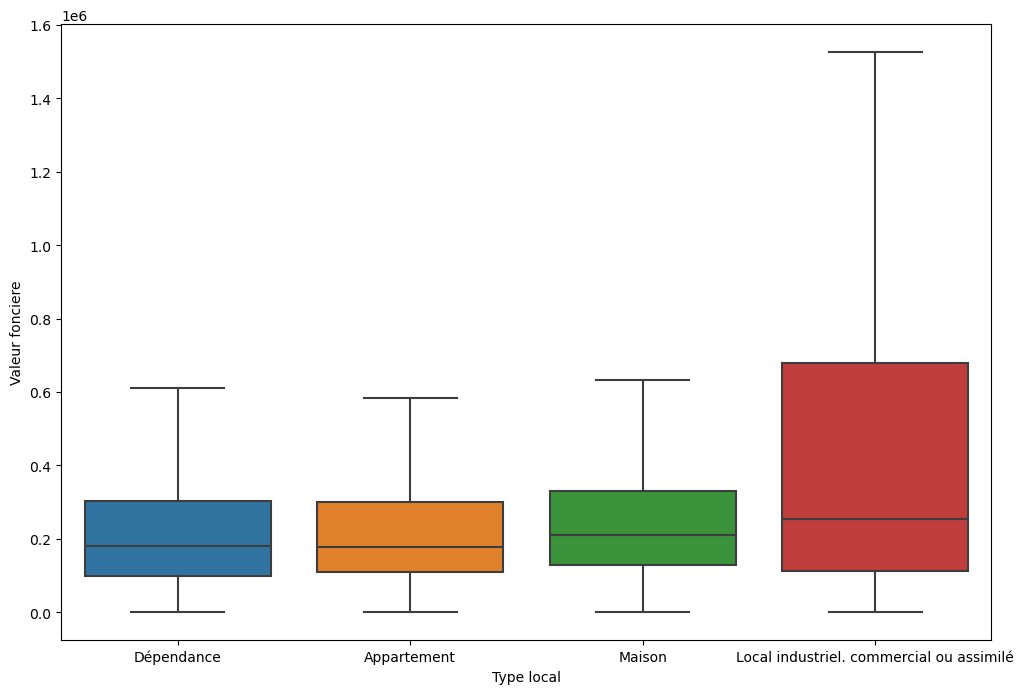

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(data=df_2023,x="Type local",y="Valeur fonciere",showfliers=False)
plt.show()

<Axes: xlabel='Code departement', ylabel='Valeur fonciere'>

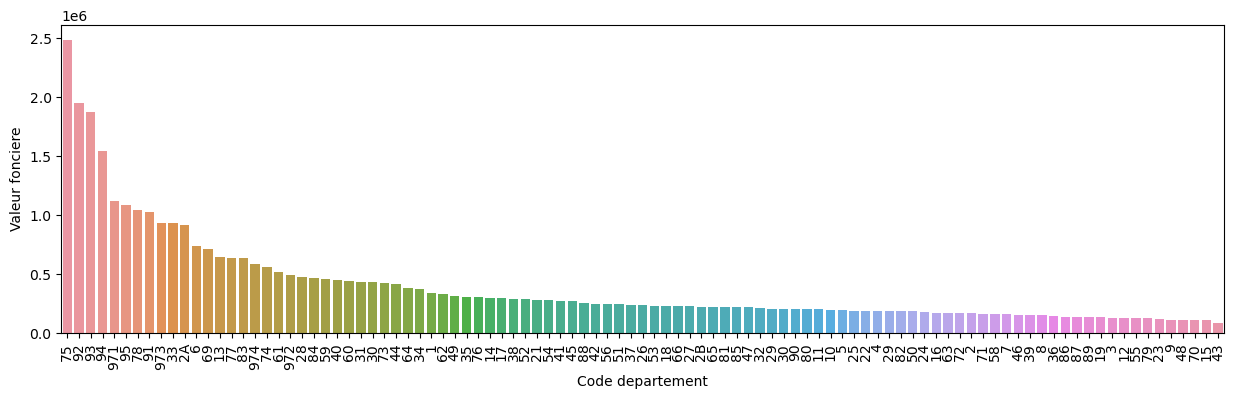

In [66]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
df_mean=df_2023.groupby(by="Code departement")["Valeur fonciere"].mean().reset_index()
df_mean.sort_values(by="Valeur fonciere",ascending=False,inplace=True)
sns.barplot(data=df_mean,x="Code departement",y="Valeur fonciere")

In [67]:
df_2023.isnull().sum()
#savoir le nombre de Nan dans chaque ligne

No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                     0
No voie                       1381359
B/T/Q                         3283136
Type de voie                  1448512
Code voie                       28101
Voie                            28613
Code postal                     28334
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            3268781
Section                           167
No plan                             0
No Volume                     3419977
1er lot                       2325648
Surface Carrez du 1er lot           0
2eme lot                      3102067
Surface Carrez du 2eme lot          0
3eme lot                      3378878
Surface Carrez du 3eme lot          0
4eme lot                      3412849
Surface Carrez du 4eme lot          0
5eme lot                      3421425
Surface Carr

<Axes: xlabel='Nombre pieces principales', ylabel='Valeur fonciere'>

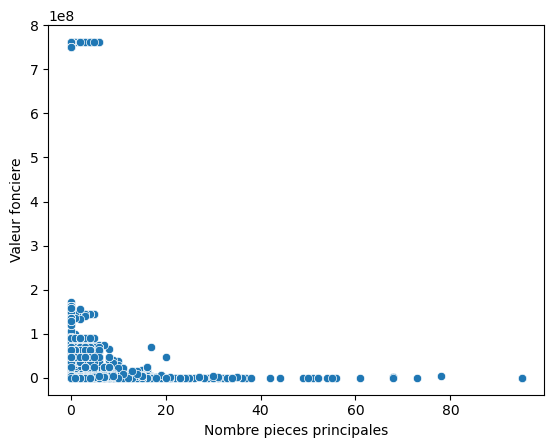

In [101]:
mask_nb_ch=df_2023["Nombre pieces principales"]
df_2023_nb=df_2023["Nombre pieces principales"].dropna(axis=0,how="all")
sns.scatterplot(x=df_2023_nb,y=df_2023["Valeur fonciere"])